# 2. GMM (Gaussian Mixture Model)

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']

irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target']=iris.target

In [5]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels=gmm.predict(iris.data)

# 군집화 결과
irisDF['gmm_cluster']=gmm_cluster_labels

In [6]:
# target 값에 따라 gmm_cluster 값이 어떻게 매핑되었는지 확인

iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
iris_result

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64

In [12]:
# Kmeans cluster
kmeans=KMeans(n_clusters=3, init='k-means++',max_iter=300, random_state=0).fit(iris.data)
kemans_cluster_labels = kmeans.predict(iris.data)

irisDF['kmeans_cluster']=kemans_cluster_labels
iris_result=irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
iris_result

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64

#### 군집 시각화
- visualize_cluster_plot() 함수 생성

In [21]:
def visualize_cluster_plot(clusterobj, dataframe, label_name,iscenter=True):
    
    # GMM은 center속성이 없음. KMeans는 있음.
    if iscenter:
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o','s','^','x','*']
    isNoise=False
    
    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label== -1:
            cluster_legend='Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster'+str(label)  #cluster0, cluster1..
            
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                   edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0],y=center_x_y[1], s=250, color='white',
                       alpha = 0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0],y=center_x_y[1], s=70, color='k',
                       edgecolor='k', marker='$%d$' % label)
            
    if isNoise:
        legend_loc = 'upper right'
    else: legend_loc='upper right'
        
    plt.legend(loc=legend_loc)
    plt.show()

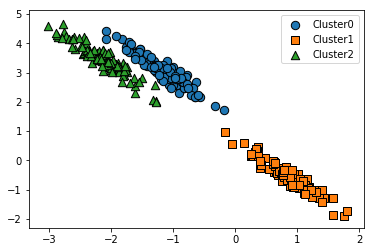

In [22]:
from sklearn.datasets import make_blobs

# 300개의 데이터셋, 3개의 군집 셋, cluster_std=0.5를 생성
X,y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터셋을 생성하기 위해 변환
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)   # np.dot(): 행렬의 곱셈 연산

clusterDF=pd.DataFrame(data=X_aniso, columns=['ftr1','ftr2'])
clusterDF['target']=y

# 생성된 데이터셋을 target별로 다른 마커로 표시해서 시각화
    # iscenter=False
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

- X_aniso 데이터셋에 kmeans 적용
    - kmeans는 주로 원형 영역으로 개별 군집화가 진행됨
    - 따라서 타원형의 데이터셋에서 군집화하는 것이 적절하지 못하다.
   

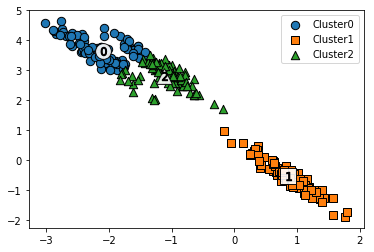

In [26]:
 kmeans=KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label']=kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

- X_aniso 데이터셋에 GMM 적용

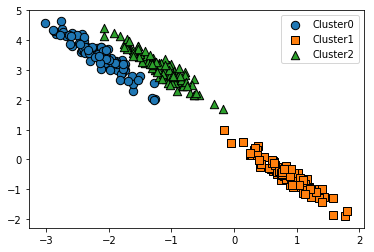

In [27]:
gmm=GaussianMixture(n_components=3, random_state=0)
gmm_label=gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GMM은 cluster_centers_속성이 없으므로 iscenter를 False로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)